In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Data Exploration
Try and visualize different data attributes.

In [6]:
path_to_data = './data'
df = pd.read_csv(os.path.join(path_to_data,'labels.csv'))

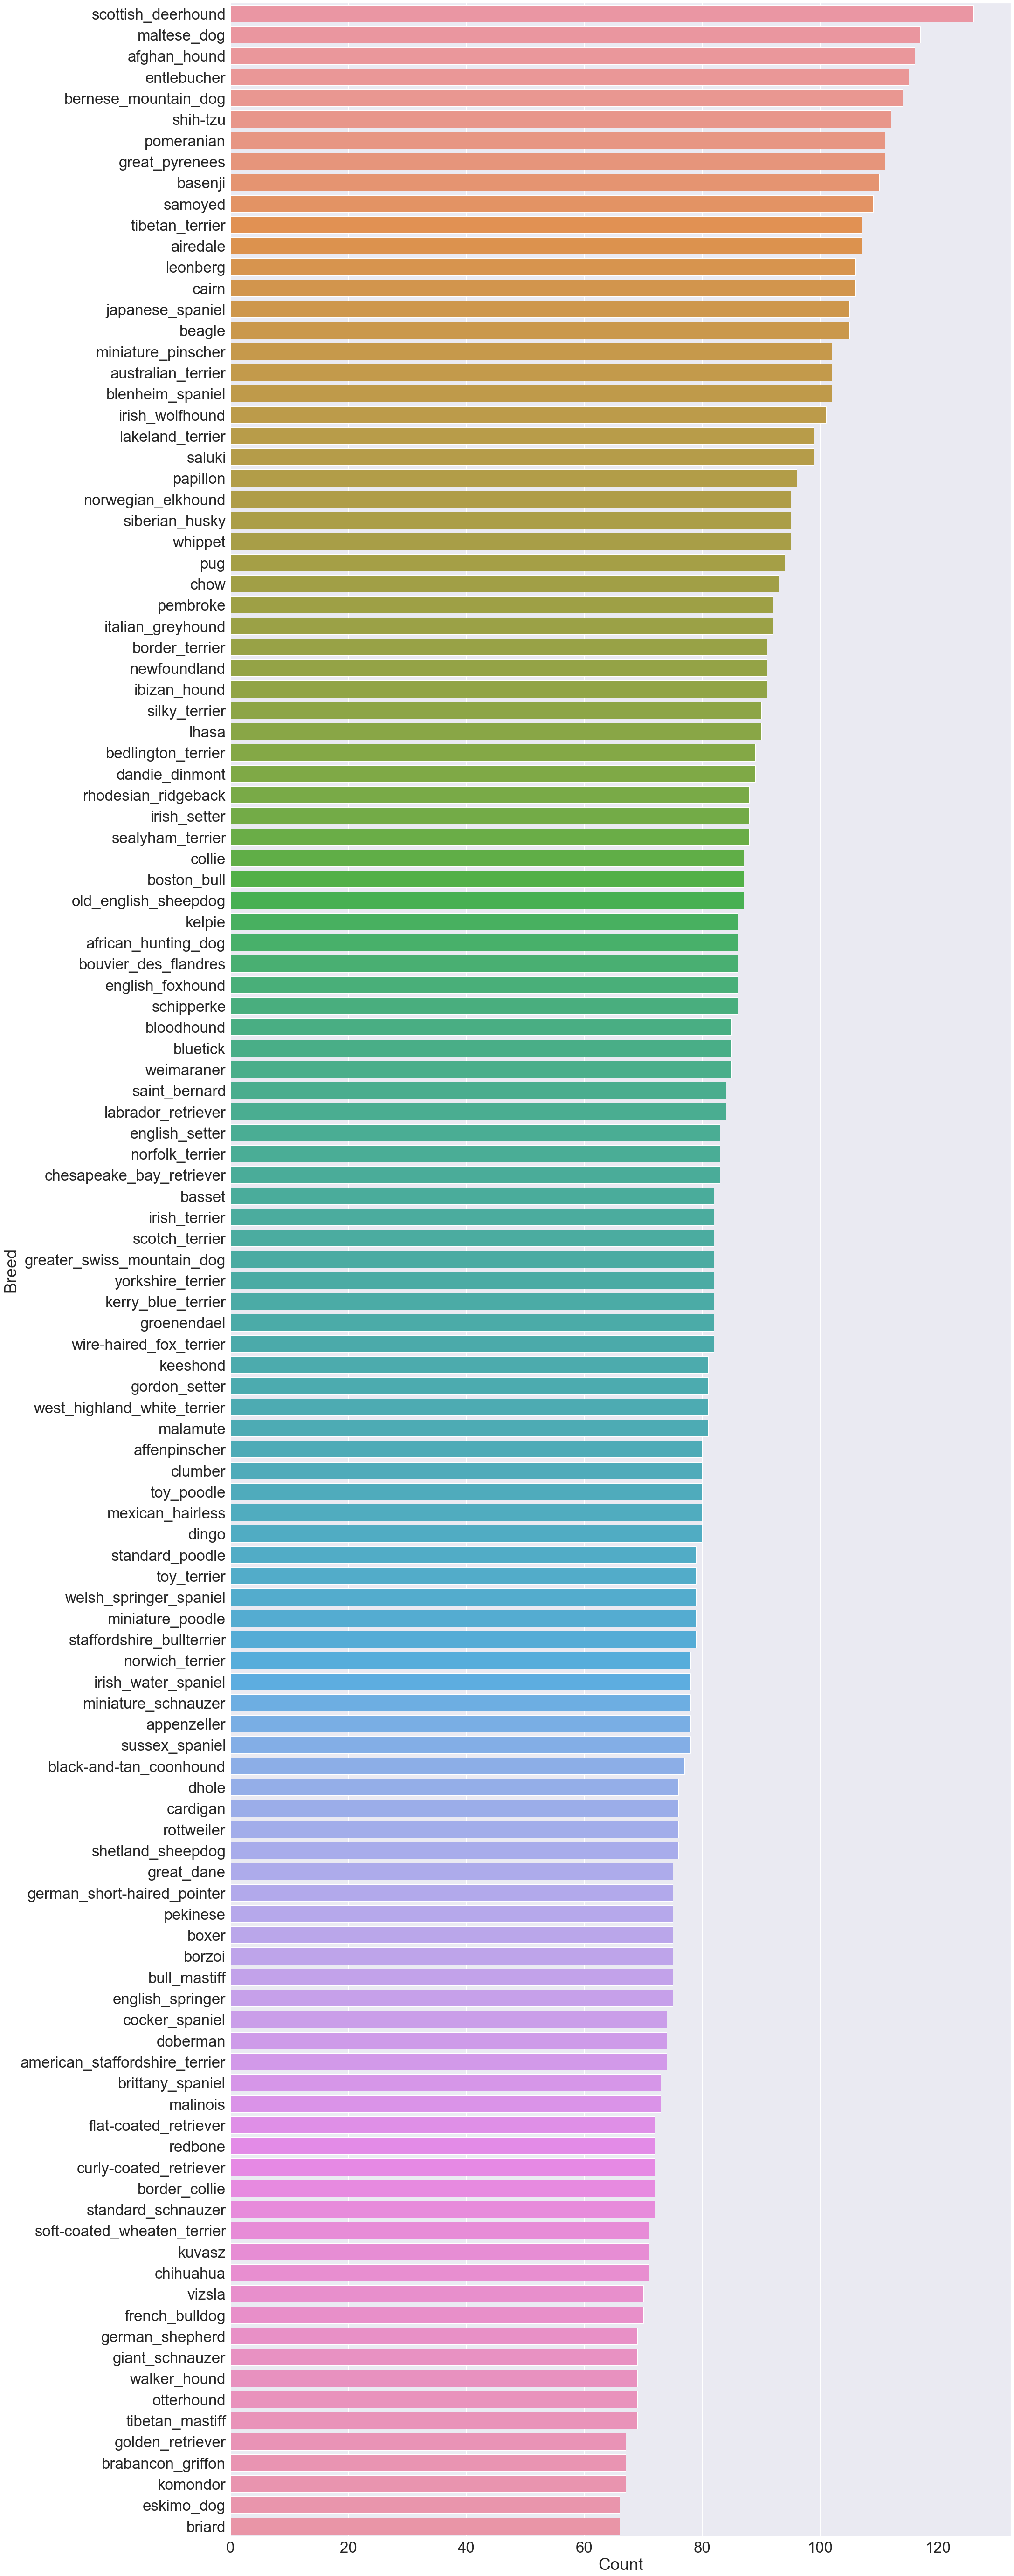

In [4]:
# Build a dataframe with the number of instances in each class
breed_distrib = df.breed.value_counts().reset_index().rename(columns={'index': 'Breed', 'breed': 'Count'})

# Horizontal bar plot
plt.figure(figsize=(30,100))
sns.set(style="whitegrid")
sns.set(font_scale=3)
ax = sns.barplot(breed_distrib.Count,breed_distrib.Breed)
plt.show()

Lets try displaying some images with their breed name.

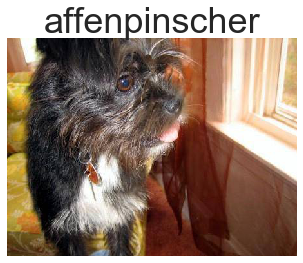

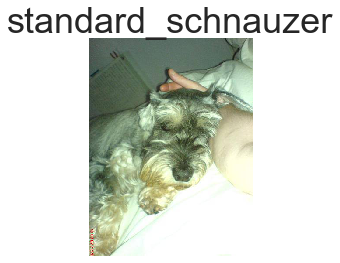

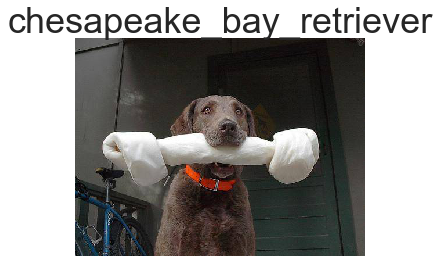

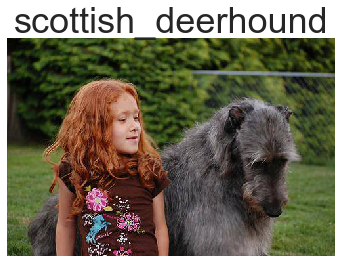

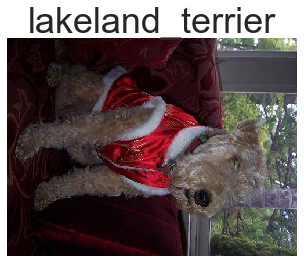

In [5]:
for i in range(5):
    br = breed_distrib.Breed.sample(n = 1).values[0]
    path = df.loc[df['breed'] == br].iloc[0].id + '.jpg'
    path = os.path.join(path_to_data,'train',path)
    img = plt.imread(path)
    plt.axis('off')
    plt.imshow(img)
    plt.title(br)
    plt.show() 

Now that we have seen a few images and their category, lets load the image and label data into memory. This can be done either by loading the entire dataset into memory, or by using generator.

Now, for using machine learning algorithms, we need to flatten each image and then use it, as machine learning algorithms only understand vector data. So the generator function that we use will flatten the image and then return it.

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [10]:
from keras.preprocessing import image

In [48]:
# Create function to load training data and process it so that ML algorithm can be used.
def load_img_data(df, path,img_colname,label_colname,img_ext,label_encoder):
    X = []
    Y = []
    for i in range(int(df.shape[0])):
        img_path = os.path.join(path, df.iloc[i][img_colname] + img_ext)
    
        img = image.load_img(img_path, target_size=(80, 80))
        x = image.img_to_array(img)
        x = x.flatten()
        # Normalizing pixel values by dividing by 255.
        x /= 255.0
        y = df.iloc[i][label_colname]
        y = label_encoder.transform(np.reshape(y,(1,-1)))
        X.append(x)
        Y.append(y)
    
    return X,Y

In [11]:
# Encode the breed name in data csv.
label_encoder = LabelEncoder()
df['enc_breed'] = label_encoder.fit_transform(df['breed'])
y = df['enc_breed'] 

# One hot encode the breed labels.
#onehot = OneHotEncoder()
#y = onehot.fit_transform(np.expand_dims(y, axis=1)).toarray()

In [6]:
# Load the images and labels using load image data function.
path = "./data/train"
img_colname = "id"
label_colname = "breed"
img_ext = ".jpg"

X,Y = load_img_data(df,path,img_colname,label_colname,img_ext,label_encoder)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [7]:
# Once data is loaded, lets try getting the shape and size of the data.
print("Shape of image data, X: ",len(X),"x",X[0].shape)
print("Shape of label data, Y: ",len(X),"x",X[0].shape)

Shape of image data, X:  10222 x (19200,)
Shape of label data, Y:  10222 x (19200,)


In [8]:
print("Sample input image data:",X[0])
print("Sample input label data:",Y[0])

Sample input image data: [0.5568628  0.37254903 0.2        ... 0.8392157  0.6313726  0.42745098]
Sample input label data: [19]


Now that we have prepared our training data, lets start by dividing our data into training and test set. Then we will train a few chosen algorithms on the data to see the output.

In [9]:
# Dividing prepared data into train and test set. Choosing stratified split here, so that data distribution is maintained.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=13)
print("Train image shape:",len(X_train),"x",X_train[0].shape)
print("Train label shape:",len(y_train),"x",y_train[0].shape)
print("Test image shape:",len(X_test),"x",X_test[0].shape)
print("Test image shape:",len(y_test),"x",y_test[0].shape)

Train image shape: 8177 x (19200,)
Train label shape: 8177 x (1,)
Test image shape: 2045 x (19200,)
Test image shape: 2045 x (1,)


# Now lets train some ML algorithms on this dataset.

Choosing 3 algorithms,
1. SVM
2. Random Forest
3. Stochastic Gradient Descent
We will perform cross validation to tune the parameters in each case.

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [15]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
clf.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [16]:
# prediction results
predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.019559902200488997
              precision    recall  f1-score   support

           0       0.02      0.12      0.03        16
           1       0.02      0.09      0.03        23
           2       0.01      0.06      0.02        17
           3       0.01      0.05      0.02        22
           4       0.00      0.00      0.00        15
           5       0.02      0.06      0.03        16
           6       0.03      0.14      0.06        21
           7       0.02      0.09      0.04        22
           8       0.00      0.00      0.00        16
           9       0.02      0.05      0.02        21
          10       0.04      0.11      0.05        18
          11       0.00      0.00      0.00        23
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        21
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        17
          16       0.05      0.07      0.06       

In [17]:
from sklearn.svm import SVC, LinearSVC
# SVM with SVC kernel
svm_svc = SVC(kernel='rbf', gamma=0.5, C=0.1)
svm_svc.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=0.1, gamma=0.5)

In [19]:
# prediction results
predictions = svm_svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.012224938875305624
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        23
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        21
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00       

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The results are nowhere near good, but it is a starting point. The naive, archaic method that we used had a problem from the beginning. We are flattening the image. So the resulting vector elements do not have the same meaning as a pixel. Plus the image size will always result in a dataset with not so small dimensions. So we next move onto feature reduction techniques like HOG that reduce the feature size while trying to retain as much variance as possible.

Lets first see what a HOG transformation would look like.

In [8]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale, resize

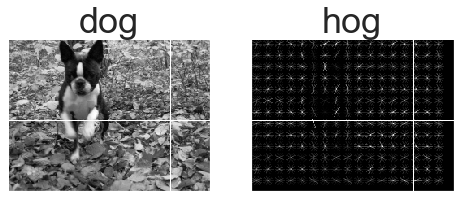

In [11]:
image_id = df.iloc[0].id+".jpg"
path = os.path.join(path_to_data,"train",image_id)

# Read the image as grayscale.
dog = imread(path, as_gray=True)

# scale down the image to one half.
dog = rescale(dog, 1/2, mode='reflect')

# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [12]:
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

number of pixels:  47000
number of hog features:  6912


As you can see, the feature set size has been reduced to almost 15% of the original size. And yet, on visually comparing the two images, we can still make out the dog in the hog image. The percentage reduced can vary with images as the sizes vary, but we will definitly see reduction by a large magnitude.

We mainly followed 3 steps here:
1. Resized the image after loading.
2. Converted the 3 channel RGB image to single channel grayscale (HOG works only on single channel).
3. Applied HOG transform.

Each of these steps is a transformation. Scikit-Learn provides a lot of built-in transformers, along with classes to implement your own custom transformer. We will be creating our own transformers for this.

# Building transformers for feature reduction

In [66]:
#Import the base classes that need to be inherited.
import skimage
from sklearn.base import BaseEstimator, TransformerMixin
import traceback

# Creating the class for RGB to grayscale transformer.
class Grayscale(BaseEstimator, TransformerMixin):
    """
    Convert images in an array from RGB to Grayscale.
    Only pass a group of images in an array.
    Do not send a single image array, as it won't be handled.
    The images need to be loaded using library methods that return
    a numpy array of 3 channels, RGB respectively. If any other method 
    is used, tranform the images to the RGB numpy array format.
    """
    def __init__(self):
        pass
    
    
    def fit(self, X, y = None):
        """
        Returns the class object itself without performing any transformation.
        """
        return self
    
    
    def transform(self, X, y = None):
        """
        Transforms all images in X from RGB to grayscale.
        """
        try:
            return np.array([skimage.color.rgb2gray(img) for img in X])
        except:
            traceback.print_exc()

    
# Creating the class for Hog Transformation.
class HOG(BaseEstimator, TransformerMixin):
    """
    Calculates HOG features for each image in an array.
    The image needs to be single channel.
    Only pass a group of images in an array.
    Do not send a single image array, as it won't be handled.
    The images need to be loaded using library methods that return
    a numpy array of 3 channels, RGB respectively. If any other method 
    is used, tranform the images to the RGB numpy array format.
    """
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        """
        Initialize object parameters with arguments passed.
        """
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        """
        Returns object without performing any transformation.
        """
        return self
 
    def transform(self, X, y=None):
        """
        Transforms images in given array by applying HOG on them.
        """
        def apply_hog(img):
            return hog(img,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm,
                       visualize=False)
 
        try: 
            return np.array([apply_hog(img) for img in X])
        except:
            traceback.print_exc()

Now that we have our transformers, lets redefine our data loading function to load images and resize them, but not flatten them.

In [55]:
# Redefining load data function. Adding two arguments. width and height, to resize all images.
# We won't be normalizing the images here.
def load_img_data(df, path,img_colname,label_colname,img_ext,label_encoder, width, height):
    X = []
    Y = []
    for i in range(int(df.shape[0])):
        img_path = os.path.join(path, df.iloc[i][img_colname] + img_ext)
    
        img = imread(img_path)
        x = resize(img, (width, height))
        y = df.iloc[i][label_colname]
        y = label_encoder.transform(np.reshape(y,(1,-1)))
        X.append(x)
        Y.append(y)
    
    return np.array(X),np.array(Y)

In [5]:
# Encode the breed name in data csv.
label_encoder = LabelEncoder()
df['enc_breed'] = label_encoder.fit_transform(df['breed'])
y = df['enc_breed'] 

In [57]:
# Load the images and labels using load image data function.
path = "./data/train"
img_colname = "id"
label_colname = "breed"
img_ext = ".jpg"
width = 80
height = 80

X,Y = load_img_data(df,path,img_colname,label_colname,img_ext,label_encoder, width, height)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [58]:
# Once data is loaded, lets try getting the shape and size of the data.
print("Shape of image data, X: ",X.shape[0],"x",X[0].shape)
print("Shape of label data, Y: ",Y.shape[0],"x",Y[0].shape)

Shape of image data, X:  10222 x (80, 80, 3)
Shape of label data, Y:  10222 x (1,)


In [65]:
Y[0]

array([19], dtype=int64)

In [59]:
# Create train test sets.
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=13)

Now we have all the basic data sets ready with us. We can now start applying our transformers and then move on to classification. We will utilise Scikit-Learns Pipeline module for this as it is a very clean and nifty way to define and execute workflows.

In [67]:
from sklearn.pipeline import Pipeline
# We will now be using SGD classifier as earlier we have used SVM and Random Forest.
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('grayscale', Grayscale()),
    ('hog_transform', HOG(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('standardize', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])

# Fit model over pipeline.
pipeline_model = pipeline.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


KeyboardInterrupt: 

In [45]:
# prediction results
predictions = pipeline_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.041075794621026895
              precision    recall  f1-score   support

           0       0.10      0.12      0.11        16
           1       0.08      0.13      0.10        23
           2       0.09      0.12      0.10        17
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        15
           5       0.09      0.06      0.07        16
           6       0.07      0.10      0.08        21
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        18
          11       0.09      0.09      0.09        23
          12       0.00      0.00      0.00        15
          13       0.03      0.05      0.04        21
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        17
          16       0.07      0.07      0.07       

We still get a similar kind of low metric scores. What could be the reason behind this?

We are dealing with a multi-class classification where the number of classes is large (120) and the classes are not equally distributed. This imbalance definitely hampers learning. Plus there are some classes in which there just aren't enough images. So we can try balancing our classes either by upsampling, downsampling, using class weights or by data augmentation. There are separate pros and cons for each of these methods, but for starters, we can certainly try reducing the number of classes to those that have more than a certain number of images and then using class weights.

We have so far also not performed any parameter tuning on the classifiers (mainly because the metric values have been so terrible). 

Most importantly, we might not be using algorithms that best suit the data. We have so far been using feature reduction techniques to convert multi channel images into single vectors by considering only a single channel. We are already loosing a lot of information.

But lets tackle each problem and see how far we can proceed.

# Reducing number of classes and balancing

In [13]:
# We will use breed_distrib dataframe to find top 6 classes based on image count.
top_6_classes = breed_distrib.nlargest(6, "Count").Breed.tolist()
top_6_classes

['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu']

In [14]:
# Load data of only these 6 classes.
reduced_df = df.loc[df['breed'].isin(top_6_classes)]
reduced_df.reset_index(inplace=True)
reduced_df.drop(["index"],axis = 1,inplace=True)
print("Number of samples:",len(reduced_df))

Number of samples: 700


C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
# Encode the breed name in data csv.
label_encoder = LabelEncoder()
reduced_df['enc_breed'] = label_encoder.fit_transform(reduced_df['breed'])
y = reduced_df['enc_breed'] 

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Load the images and labels using load image data function.
path = "./data/train"
img_colname = "id"
label_colname = "breed"
img_ext = ".jpg"
width = 80
height = 80

X,Y = load_img_data(reduced_df,path,img_colname,label_colname,img_ext,label_encoder, width, height)

NameError: name 'load_img_data' is not defined

In [84]:
# Once data is loaded, lets try getting the shape and size of the data.
print("Shape of image data, X: ",X.shape[0],"x",X[0].shape)
print("Shape of label data, Y: ",Y.shape[0],"x",Y[0].shape)

Shape of image data, X:  700 x (80, 80, 3)
Shape of label data, Y:  700 x (1,)


In [12]:
from sklearn.model_selection import train_test_split

In [85]:
# Create train test sets.
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=13)

In [86]:
from sklearn.pipeline import Pipeline
# We will now be using SGD classifier as earlier we have used SVM and Random Forest.
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('grayscale', Grayscale()),
    ('hog_transform', HOG(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('standardize', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])

# Fit model over pipeline.
pipeline_model = pipeline.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [87]:
# prediction results
predictions = pipeline_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.32142857142857145
              precision    recall  f1-score   support

           0       0.47      0.39      0.43        23
           1       0.41      0.39      0.40        23
           2       0.28      0.39      0.33        23
           3       0.19      0.17      0.18        24
           4       0.32      0.28      0.30        25
           5       0.29      0.32      0.30        22

    accuracy                           0.32       140
   macro avg       0.33      0.32      0.32       140
weighted avg       0.33      0.32      0.32       140



Now this is an improvement over previous runs, if you see the metric values for each class.
Lets further try and improve the performance by providing class weights.

In [94]:
# Computing class weights.
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced',
                                    np.unique(np.ravel(y_train,order='C')),
                                    np.ravel(y_train,order='C'))
class_weights = {i : class_weights[i] for i in range(len(class_weights))}
print("Class weights computed:",class_weights)

Class weights computed: {0: 1.003584229390681, 1: 1.0256410256410255, 2: 1.0144927536231885, 3: 1.003584229390681, 4: 0.9240924092409241, 5: 1.037037037037037}


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5], y=[3 5 5 0 2 5 2 1 3 0 0 1 1 3 0 3 5 3 2 1 3 5 4 0 5 5 1 4 4 2 1 2 3 5 3 1 0
 4 3 0 4 4 0 5 1 2 4 1 2 0 2 1 5 3 5 3 2 4 1 0 5 2 0 3 5 4 1 1 2 5 2 5 5 4
 3 5 1 1 0 0 5 3 4 1 3 0 4 0 4 3 5 0 1 4 2 2 4 3 2 4 0 5 5 4 0 0 4 5 5 3 1
 1 0 0 3 3 5 0 1 2 0 5 3 0 1 5 0 5 3 0 1 2 4 2 4 0 0 2 4 2 3 1 0 5 0 1 4 1
 3 4 5 5 5 0 5 2 2 1 4 3 4 3 2 2 4 1 0 0 4 5 4 0 1 0 2 2 4 3 2 0 2 4 3 3 4
 3 2 5 1 3 0 5 0 4 3 4 0 0 5 5 0 3 2 0 0 4 2 5 4 4 2 0 1 3 2 3 4 2 1 1 1 5
 1 4 2 2 2 0 0 3 0 2 5 3 1 0 4 0 0 2 0 5 1 3 5 3 3 1 1 5 0 1 2 4 0 3 4 2 1
 1 2 3 2 2 0 0 4 5 5 4 3 5 3 5 0 0 1 4 1 5 3 5 5 3 4 5 2 2 3 2 0 3 0 5 4 5
 4 0 2 3 3 1 0 2 0 5 5 4 0 2 2 1 1 1 1 5 5 3 0 2 4 4 4 2 1 5 2 5 4 2 0 4 4
 2 2 3 3 3 2 4 1 3 4 0 5 1 4 0 4 5 4 3 5 0 5 3 1 3 1 4 1 3 4 5 0 0 0 3 0 4
 2 5 2 5 3 0 2 0 2 1 5 3 1 2 2 3 3 3 3 4 1 0 3 4 3 3 2 4 0 5 4 2 0 5 3 3 5
 2 1 2 4 2 2 5 4 2 2 3 1 1 4 5 4 3 2 1 0 2 2 1 1 0 4 4 4

In [95]:
from sklearn.pipeline import Pipeline
# We will now be using SGD classifier as earlier we have used SVM and Random Forest.
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('grayscale', Grayscale()),
    ('hog_transform', HOG(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('standardize', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3, class_weight = class_weights))
])

# Fit model over pipeline.
pipeline_model = pipeline.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [96]:
# prediction results
predictions = pipeline_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.2785714285714286
              precision    recall  f1-score   support

           0       0.35      0.26      0.30        23
           1       0.43      0.39      0.41        23
           2       0.24      0.35      0.28        23
           3       0.17      0.17      0.17        24
           4       0.25      0.24      0.24        25
           5       0.29      0.27      0.28        22

    accuracy                           0.28       140
   macro avg       0.29      0.28      0.28       140
weighted avg       0.29      0.28      0.28       140



This seems to have reduced the overall performance with the same parameters.
Lets try parameter tuning as well as other classifiers with cross validation.

In [97]:
# Lets define parameters for Hog transform and classifier to grid search and cross validate over.
from sklearn.model_selection import GridSearchCV

# Parameters for Hog transform.
param_grid = [
    {
        'hog_transform__orientations': [8, 9],
        'hog_transform__cells_per_block': [(2, 2), (3, 3)],
        'hog_transform__pixels_per_cell': [(8, 8), (10, 10), (12, 12)]
    },]

In [98]:
# Grid search over the given parameters.
grid_search = GridSearchCV(pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)

# Train the grid search cross validator model.
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   19.6s finished
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [99]:
# Print the best pipeline estimators.
grid_res.best_estimator_

Pipeline(steps=[('grayscale', Grayscale()),
                ('hog_transform',
                 HOG(cells_per_block=(2, 2), pixels_per_cell=(12, 12))),
                ('standardize', StandardScaler()),
                ('classify',
                 SGDClassifier(class_weight={0: 1.003584229390681,
                                             1: 1.0256410256410255,
                                             2: 1.0144927536231885,
                                             3: 1.003584229390681,
                                             4: 0.9240924092409241,
                                             5: 1.037037037037037},
                               random_state=42))])

In [100]:
# Print the best score obtained during training
grid_res.best_score_

0.34283058286853346

In [101]:
# prediction results
predictions = grid_res.predict(X_test)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.2357142857142857
              precision    recall  f1-score   support

           0       0.27      0.26      0.27        23
           1       0.25      0.35      0.29        23
           2       0.25      0.30      0.27        23
           3       0.19      0.12      0.15        24
           4       0.14      0.12      0.13        25
           5       0.29      0.27      0.28        22

    accuracy                           0.24       140
   macro avg       0.23      0.24      0.23       140
weighted avg       0.23      0.24      0.23       140



Lets try another set of grid search parameters, now along with SVM classifier.

In [108]:
# Defining new set of parameters.
from sklearn import svm
param_grid = [
    {
        'hog_transform__orientations': [8,9],
         'hog_transform__cells_per_block': [(2,2),(3, 3)],
         'hog_transform__pixels_per_cell': [(10,10),(12,12),(14,14)],
         'classify': [
             SGDClassifier(random_state=42, max_iter=1000, tol=1e-3,class_weight = "balanced"),
             svm.SVC(kernel='rbf',class_weight = class_weights)
         ]
    }
]

In [109]:
# Grid search over the given parameters.
grid_search = GridSearchCV(pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)

# Train the grid search cross validator model.
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   28.6s finished
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [110]:
# Print the best pipeline estimators.
grid_res.best_estimator_

Pipeline(steps=[('grayscale', Grayscale()),
                ('hog_transform', HOG(pixels_per_cell=(10, 10))),
                ('standardize', StandardScaler()),
                ('classify',
                 SVC(class_weight={0: 1.003584229390681, 1: 1.0256410256410255,
                                   2: 1.0144927536231885, 3: 1.003584229390681,
                                   4: 0.9240924092409241,
                                   5: 1.037037037037037}))])

In [111]:
# Print the best score obtained during training
grid_res.best_score_

0.4142947501581278

In [112]:
# prediction results
predictions = grid_res.predict(X_test)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.39285714285714285
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        23
           1       0.33      0.30      0.32        23
           2       0.36      0.43      0.39        23
           3       0.27      0.29      0.28        24
           4       0.42      0.40      0.41        25
           5       0.40      0.27      0.32        22

    accuracy                           0.39       140
   macro avg       0.39      0.39      0.39       140
weighted avg       0.39      0.39      0.39       140



In [129]:
# Lets try with Random Forest Classifier.
# Defining new set of parameters.
from sklearn.ensemble import RandomForestClassifier
param_grid = [
    {
        'hog_transform__orientations': [8,9],
         'hog_transform__cells_per_block': [(2,2),(3, 3)],
         'hog_transform__pixels_per_cell': [(10,10),(12,12),(14,14)],
         'classify': [
             RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42),
             RandomForestClassifier(n_estimators = 250, criterion = 'entropy', random_state = 42),
         ]
    }
]

In [130]:
# Grid search over the given parameters.
grid_search = GridSearchCV(pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)

# Train the grid search cross validator model.
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.5min finished
C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [131]:
# Print the best pipeline estimators.
print(grid_res.best_estimator_)

# Print the best score obtained during training
print(grid_res.best_score_)

Pipeline(steps=[('grayscale', Grayscale()),
                ('hog_transform',
                 HOG(orientations=8, pixels_per_cell=(10, 10))),
                ('standardize', StandardScaler()),
                ('classify',
                 RandomForestClassifier(criterion='entropy', n_estimators=250,
                                        random_state=42))])
0.408899239070017


In [132]:
# prediction results
predictions = grid_res.predict(X_test)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.32857142857142857
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        23
           1       0.31      0.22      0.26        23
           2       0.32      0.35      0.33        23
           3       0.29      0.29      0.29        24
           4       0.31      0.44      0.36        25
           5       0.27      0.18      0.22        22

    accuracy                           0.33       140
   macro avg       0.33      0.33      0.32       140
weighted avg       0.33      0.33      0.32       140



Even after all this parameter tuning, we still get a max score of 39% only, from SVM. 

So based on the data and reduced features data, this seems to be the max performance we can get.

We need to try a different approach. And for images, Convolutional Neural Networks have been proven to work well.

Lets try CNNs then.

# Deep Learning : Convolutional Neural Networks

CNNs work on the basis of convolution operation. This enables CNNs to work on complete images without any need for reducing channels. Moreover, convolution considers a pixels neighborhood as well with the pixel to create a feature. As the neighbourhood is considered, the gradient as well as orientation are all considered in the feature.

The features created by CNNs can be used by ML algorithm to classify images or a classification output layer can directly be added to the CNN itself. Here we will try both. We will also try transfer learning, utilizing state-of-the-art CNNs.

In [8]:
# Importing Tensorflow to access keras.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [6]:
from tensorflow.python import keras

In [9]:
from keras.preprocessing import image

In [12]:
# Importing all required modules and methods.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm # Fancy progress bars

from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3

In [20]:
# We will begin with top 6 classes. With neural nets, they can easily be expanded to the full range of classes.
INPUT_SIZE = 224
NUM_CLASSES = 6
SEED = 13

top_6_classes = breed_distrib.nlargest(6, "Count").Breed.tolist()
# Load data of only these 6 classes.
reduced_df = df.loc[df['breed'].isin(top_6_classes)]
reduced_df.reset_index(inplace=True)
reduced_df.drop(["index"],axis = 1,inplace=True)
print("Number of samples:",len(reduced_df))

Number of samples: 700


In [16]:
# Encode the breed name in data csv.
label_encoder = LabelEncoder()
reduced_df['enc_breed'] = label_encoder.fit_transform(reduced_df['breed'])

# Get the image ids and corresponding breed labels.
y = reduced_df['enc_breed'].values
img_ids = reduced_df['id'].values

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Lets create the training, validation and test set from the image ids and breed labels.
id_train, id_test, y_train, y_test = train_test_split(img_ids, y, test_size=0.2, stratify = y, random_state=13)

id_train, id_val, y_train, y_val = train_test_split(id_train, y_train, test_size=0.2, stratify = y_train, random_state=13)

In [18]:
print("Number of samples in Train-Validate_Test : {0}-{1}-{2}".format(id_train.shape[0],id_val.shape[0],id_test.shape[0]))

Number of samples in Train-Validate_Test : 448-112-140


We can process and load all 700 images into memory and proceed, since the number of images is less. But we will ultimately be using all samples, which will be memory intensive to load all together. So we will create and use data genrators from now on.

In [14]:
# CReating image data loader generator function.
def image_generator(model_name, path, img_ids, labels, batch_size = 64, height = 224, width = 224):
    # Import custom input processor as per SOTA model chosen.
    if model_name in ("inceptionresnet","inceptionresnetv2"):
        from keras.applications.inception_resnet_v2 import preprocess_input
    elif model_name in ("resnet","resnet50"):
        from keras.applications.resnet50 import preprocess_input
    elif model_name in ("xception"):
        from keras.applications.xception import preprocess_input
    elif model_name in ("inception","inceptionv3"):
        from keras.applications.inception_v3 import preprocess_input
    else:
        from keras.applications.vgg16 import preprocess_input
        
    # Defining function to load and process images.
    def load_image(img_path, height, width):
        # Function to load and process an image.
        img = image.load_img(img_path, target_size=(height, width))
        img = image.img_to_array(img)
        #img = preprocess_input(np.expand_dims(img, axis=0))
        img = preprocess_input(img)
        
        return img
        
        
    num_images = img_ids.shape[0]
    file_paths = [os.path.join(path,'%s.jpg' % img_id) for img_id in img_ids]
    
    while True:
        start = 0
        end = batch_size
        while start < num_images:
            end = min(end,num_images)
            
            # Load batch images.
            X = [load_image(img_path,height,width) for img_path in file_paths[start:end]]
            X = np.array(X)
            Y = labels[start:end]
            
            start += batch_size
            end += batch_size
            #yield (X,Y)
            yield X

In [24]:
# Create train, val and test data generators.
data_path = "./data/train"
BATCH = 32
train_data_gen = image_generator("vgg", data_path, id_train, y_train, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)
val_data_gen = image_generator("vgg", data_path, id_val, y_val, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)
test_data_gen = image_generator("vgg", data_path, id_test, y_test, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)

We have got our data processing generators ready. We can move on to model definitions. We will first start with using SOTA models to get features from image inputs.

In [15]:
# Starting with VGG16 to extract features from images.
vgg_feature_model = VGG16(weights='imagenet', include_top=False, pooling="avg")

In [25]:
# Geting features for train and validation dataset.
train_vgg_fs = vgg_feature_model.predict_generator(train_data_gen, steps = round(y_train.shape[0]/BATCH), verbose=1)
valid_vgg_fs = vgg_feature_model.predict_generator(val_data_gen, steps = round(y_val.shape[0]/BATCH), verbose=1)
test_vgg_fs = vgg_feature_model.predict_generator(test_data_gen, steps = round(y_test.shape[0]/BATCH) + 1, verbose=1)

5/5 [==============================] - 15s 4s/step


In [26]:
# Print obtained feature shape.
print('VGG16 training set features shape: {} size: {:,}'.format(train_vgg_fs.shape, train_vgg_fs.size))
print('VGG16 validation set features shape: {} size: {:,}'.format(valid_vgg_fs.shape, valid_vgg_fs.size))
print('VGG16 test set features shape: {} size: {:,}'.format(test_vgg_fs.shape, test_vgg_fs.size))

VGG16 training set features shape: (448, 512) size: 229,376
VGG16 validation set features shape: (112, 512) size: 57,344
VGG16 test set features shape: (140, 512) size: 71,680


Now that we have these features, we can use them in any ML algorithm to perform our classification.

In [43]:
# Trying SVM first.
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4,1e-5,1e-6],
                     'C': [3.5,4,5]},
                    ]

clf = GridSearchCV(svm.SVC(class_weight = "balanced"), param_grid, cv = 5)
clf.fit(train_vgg_fs, y_train)

print("Best parameters:",clf.best_params_)
print("Best training score:",clf.best_score_)

Best parameters: {'C': 4, 'gamma': 1e-05, 'kernel': 'rbf'}
Best training score: 0.9397253433208489


In [44]:
# prediction results
predictions = clf.predict(test_vgg_fs)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9142857142857143
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.91      0.87      0.89        23
           2       0.96      0.96      0.96        23
           3       0.86      1.00      0.92        24
           4       0.92      0.96      0.94        25
           5       0.94      0.77      0.85        22

    accuracy                           0.91       140
   macro avg       0.92      0.91      0.91       140
weighted avg       0.92      0.91      0.91       140



In [29]:
# Lets try logistic regression classifier.
from sklearn.linear_model import LogisticRegression

# Defining the parameters.
param_grid = {
                'penalty': ['l1','l2'], 
                'C': [14, 15, 16]
                }

clf = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=13), param_grid, cv = 3)
clf.fit(train_vgg_fs, y_train)

print("Best parameters:",clf.best_params_)
print("Best training score:",clf.best_score_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO.

Best parameters: {'C': 14, 'penalty': 'l2'}
Best training score: 0.9218941088739747


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
# prediction results
predictions = clf.predict(test_vgg_fs)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9071428571428571
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.95      0.87      0.91        23
           2       0.96      1.00      0.98        23
           3       0.82      0.96      0.88        24
           4       0.92      0.92      0.92        25
           5       0.89      0.77      0.83        22

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140



In [46]:
# Lets try random forest also.
# Trying SVM first.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
param_grid = {
                'bootstrap': [True, False],
                'max_depth': [10, 20, 30, ],
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [150, 200, 250]
                }

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
clf.fit(train_vgg_fs, y_train)

print("Best parameters:",clf.best_params_)
print("Best training score:",clf.best_score_)

Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
Best training score: 0.92187265917603


In [47]:
# prediction results
predictions = clf.predict(test_vgg_fs)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9214285714285714
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.91      0.91      0.91        23
           2       1.00      0.91      0.95        23
           3       0.86      1.00      0.92        24
           4       0.89      1.00      0.94        25
           5       0.94      0.77      0.85        22

    accuracy                           0.92       140
   macro avg       0.93      0.92      0.92       140
weighted avg       0.93      0.92      0.92       140



Much better. As you can see, VGG16 extracted features give a better representation of the images, keeping as much information as possible. 

Note that we have not modified VGG16 weights to fit to our data. The pre-trained IMAGENET weights themselves give us this result.

Lets now see how othe state-of-the-art models perform. So far, Random Forest Classifier gave the best training and test accuracy score. So this is the model to beat.

In [48]:
# Lets try xception now.
INPUT_SIZE = 299
# Create train, val and test data generators.
data_path = "./data/train"
BATCH = 32
train_data_gen = image_generator("xception", data_path, id_train, y_train, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)
val_data_gen = image_generator("xception", data_path, id_val, y_val, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)
test_data_gen = image_generator("xception", data_path, id_test, y_test, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)

In [49]:
xception_feature_model = xception.Xception(weights='imagenet', include_top=False, pooling="avg")

83689472/83683744 [==============================] - 13s 0us/step


In [54]:
# Geting features for train and validation dataset.
train_vgg_fs = xception_feature_model.predict_generator(train_data_gen, steps = round(y_train.shape[0]/BATCH), verbose=1)
valid_vgg_fs = xception_feature_model.predict_generator(val_data_gen, steps = round(y_val.shape[0]/BATCH), verbose=1)
test_vgg_fs = xception_feature_model.predict_generator(test_data_gen, steps = round(y_test.shape[0]/BATCH) + 1, verbose=1)

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


5/5 [==============================] - 5s 1s/step


In [51]:
# Print obtained feature shape.
print('Xception training set features shape: {} size: {:,}'.format(train_vgg_fs.shape, train_vgg_fs.size))
print('Xception validation set features shape: {} size: {:,}'.format(valid_vgg_fs.shape, valid_vgg_fs.size))
print('Xception test set features shape: {} size: {:,}'.format(test_vgg_fs.shape, test_vgg_fs.size))

Xception training set features shape: (448, 2048) size: 917,504
Xception validation set features shape: (112, 2048) size: 229,376
Xception test set features shape: (140, 2048) size: 286,720


In [52]:
# Lets try random forest also.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
param_grid = {
                'bootstrap': [True, False],
                'max_depth': [10, 20, 30, ],
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [150, 200, 250]
                }

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
clf.fit(train_vgg_fs, y_train)

print("Best parameters:",clf.best_params_)
print("Best training score:",clf.best_score_)

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best training score: 0.9888139825218477


In [53]:
# prediction results
predictions = clf.predict(test_vgg_fs)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9785714285714285
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       0.89      1.00      0.94        24
           4       1.00      1.00      1.00        25
           5       1.00      0.86      0.93        22

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



This is significantly better, although our feature space size has increased from 512 in VGG16 to 2048 for xception.
Lets try Inception next.

In [20]:
# Lets try xception now.
INPUT_SIZE = 299
# Create train, val and test data generators.
data_path = "./data/train"
BATCH = 32
train_data_gen = image_generator("inception", data_path, id_train, y_train, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)
val_data_gen = image_generator("inception", data_path, id_val, y_val, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)
test_data_gen = image_generator("inception", data_path, id_test, y_test, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)

In [22]:
# Defining the model
inception_feature_model = inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling="avg")

In [23]:
# Geting features for train and validation dataset.
train_vgg_fs = inception_feature_model.predict_generator(train_data_gen, steps = round(y_train.shape[0]/BATCH), verbose=1)
valid_vgg_fs = inception_feature_model.predict_generator(val_data_gen, steps = round(y_val.shape[0]/BATCH), verbose=1)
test_vgg_fs = inception_feature_model.predict_generator(test_data_gen, steps = round(y_test.shape[0]/BATCH) + 1, verbose=1)

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


5/5 [==============================] - 6s 2s/step


In [24]:
# Print obtained feature shape.
print('Xception training set features shape: {} size: {:,}'.format(train_vgg_fs.shape, train_vgg_fs.size))
print('Xception validation set features shape: {} size: {:,}'.format(valid_vgg_fs.shape, valid_vgg_fs.size))
print('Xception test set features shape: {} size: {:,}'.format(test_vgg_fs.shape, test_vgg_fs.size))

Xception training set features shape: (448, 2048) size: 917,504
Xception validation set features shape: (112, 2048) size: 229,376
Xception test set features shape: (140, 2048) size: 286,720


In [25]:
# Lets try random forest also.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
param_grid = {
                'bootstrap': [True, False],
                'max_depth': [10, 20, 30, ],
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [150, 200, 250]
                }

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
clf.fit(train_vgg_fs, y_train)

print("Best parameters:",clf.best_params_)
print("Best training score:",clf.best_score_)

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
Best training score: 0.9799001248439451


In [26]:
# prediction results
predictions = clf.predict(test_vgg_fs)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9785714285714285
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       0.89      1.00      0.94        24
           4       1.00      1.00      1.00        25
           5       1.00      0.86      0.93        22

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [27]:
# Lets try Inception - Resnet50, just to complete the list of SOTA models.

INPUT_SIZE = 299
# Create train, val and test data generators.
data_path = "./data/train"
BATCH = 32
train_data_gen = image_generator("inceptionresnet", data_path, id_train, y_train, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)
val_data_gen = image_generator("inceptionresnet", data_path, id_val, y_val, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)
test_data_gen = image_generator("inceptionresnet", data_path, id_test, y_test, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)

In [28]:
# Defining the model
from keras.applications.inception_resnet_v2 import InceptionResNetV2

inceptionresnet_feature_model = InceptionResNetV2(weights='imagenet', include_top=False, pooling="avg")

219062272/219055592 [==============================] - 24s 0us/step


In [29]:
# Geting features for train and validation dataset.
train_vgg_fs = inceptionresnet_feature_model.predict_generator(train_data_gen, steps = round(y_train.shape[0]/BATCH), verbose=1)
valid_vgg_fs = inceptionresnet_feature_model.predict_generator(val_data_gen, steps = round(y_val.shape[0]/BATCH), verbose=1)
test_vgg_fs = inceptionresnet_feature_model.predict_generator(test_data_gen, steps = round(y_test.shape[0]/BATCH) + 1, verbose=1)

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


5/5 [==============================] - 10s 2s/step


In [30]:
# Print obtained feature shape.
print('Xception training set features shape: {} size: {:,}'.format(train_vgg_fs.shape, train_vgg_fs.size))
print('Xception validation set features shape: {} size: {:,}'.format(valid_vgg_fs.shape, valid_vgg_fs.size))
print('Xception test set features shape: {} size: {:,}'.format(test_vgg_fs.shape, test_vgg_fs.size))

Xception training set features shape: (448, 1536) size: 688,128
Xception validation set features shape: (112, 1536) size: 172,032
Xception test set features shape: (140, 1536) size: 215,040


In [31]:
# Lets try random forest also.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
param_grid = {
                'bootstrap': [True, False],
                'max_depth': [10, 20, 30, ],
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [150, 200, 250]
                }

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
clf.fit(train_vgg_fs, y_train)

print("Best parameters:",clf.best_params_)
print("Best training score:",clf.best_score_)

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
Best training score: 0.9820973782771535


In [32]:
# prediction results
predictions = clf.predict(test_vgg_fs)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9857142857142858
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       0.92      1.00      0.96        24
           4       1.00      1.00      1.00        25
           5       1.00      0.91      0.95        22

    accuracy                           0.99       140
   macro avg       0.99      0.98      0.99       140
weighted avg       0.99      0.99      0.99       140



In [13]:
# Lets try on on all classes to see actual result on whole data.
# Get the image ids and corresponding breed labels.
y = df['enc_breed'].values
img_ids = df['id'].values

In [14]:
# Lets create the training, validation and test set from the image ids and breed labels.
id_train, id_test, y_train, y_test = train_test_split(img_ids, y, test_size=0.2, stratify = y, random_state=13)
id_train, id_val, y_train, y_val = train_test_split(id_train, y_train, test_size=0.2, stratify = y_train, random_state=13)

In [13]:
INPUT_SIZE = 299
# Create train, val and test data generators.
data_path = "./data/train"
BATCH = 32
train_data_gen = image_generator("inceptionresnet", data_path, id_train, y_train, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)
test_data_gen = image_generator("inceptionresnet", data_path, id_test, y_test, batch_size = BATCH, height = INPUT_SIZE, width = INPUT_SIZE)

In [13]:
# Defining the model
from keras.applications.inception_resnet_v2 import InceptionResNetV2

inceptionresnet_feature_model = InceptionResNetV2(weights='imagenet', include_top=False, pooling="avg")

In [15]:
# Geting features for train and validation dataset.
train_vgg_fs = inceptionresnet_feature_model.predict_generator(train_data_gen, steps = round(y_train.shape[0]/BATCH), verbose=1)
test_vgg_fs = inceptionresnet_feature_model.predict_generator(test_data_gen, steps = round(y_test.shape[0]/BATCH), verbose=1)

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


64/64 [==============================] - 147s 2s/step


In [16]:
# Print obtained feature shape.
print('Xception training set features shape: {} size: {:,}'.format(train_vgg_fs.shape, train_vgg_fs.size))
print('Xception test set features shape: {} size: {:,}'.format(test_vgg_fs.shape, test_vgg_fs.size))

Xception training set features shape: (8177, 1536) size: 12,559,872
Xception test set features shape: (2045, 1536) size: 3,141,120


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
param_grid = {
                'bootstrap': [True, False],
                'max_depth': [10, 20,],
                'max_features': ['auto',],
                'n_estimators': [200,]
                }

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3)
clf.fit(train_vgg_fs, y_train)

print("Best parameters:",clf.best_params_)
print("Best training score:",clf.best_score_)

Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}
Best training score: 0.9035087648445931


In [25]:
# prediction results
predictions = clf.predict(test_vgg_fs)
print("Accuracy:", accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.010268948655256724
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        16
           9       0.05      0.05      0.05        21
          10       0.00      0.00      0.00        18
          11       0.04      0.04      0.04        23
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        21
          14       0.12      0.12      0.12        17
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00       

Now this is not good. The metrics have again gone down drastically. Here, the classification report helps us in understanding the class distribution. As can be seen, the model tries to predict for some classes, but for most classes, it fails to make any correct prediction. That means the model while learning, is leaning more towards these classes which the model is predicting. This indicates the effect of class imbalance. 

So lets try and make the classifier view the classes in a balanced manner. Lets try some approaches.

In [18]:
# NOT USING RIGHT NOW.



# Lets begin at the data level and try and balance classes.
# There are 2 ways: oversampling and undersampling. 
# Even though they try and balance the classes, the drawbacks in our case will hamper a lot.
# So lets try a combination of both.

# We will use imbalance-learn library for our task.
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.keras import balanced_batch_generator

class BalancedDataGenerator(Sequence):
    """
    Combines image data generator with random over sampling to balance classes.
    """
    def __init__(self, x, y, datagen, batch_size=32):
        self.datagen = datagen
        self.batch_size = min(batch_size, x.shape[0])
        self.datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
        self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])
        
    def __len__(self):
        return self.steps_per_epoch

    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()
    


# Defining the data transformation pipeline.
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)

# Lets define our random forest model as well.
clf = RandomForestClassifier(bootstrap = False, max_depth = 20, max_features = 'auto', n_estimators = 200)
steps = [("o", over), ("u", under),("model",clf)]
pipeline = Pipeline(steps=steps)

# We will cross-validate the pipeline to find a better over-under sampled data.
from sklearn.model_selection import cross_val_score

# evaluate pipeline
scores = cross_val_score(pipeline, train_vgg_fs, y_train, scoring='accuracy', cv=3, n_jobs=-1)

In [15]:
# We will modify the dataframe a bit to enable working with image data generators.
# Adding .jpg at the end of each value in 'id' column.
df["id"] = df["id"] + ".jpg"

In [28]:
def add_traintest_set(row, train_list, val):
    """
    Returns train if id in row belongs to train set, otherwise test.
    """
    train_list = [img_id + ".jpg" for img_id in train_list]
    if row['id'] in train_list:
        val = val
    else:
        val = None
    return val

In [16]:
new_id_train = [img_id + ".jpg" for img_id in id_train]
new_id_val = [img_id + ".jpg" for img_id in id_val]
new_id_test = [img_id + ".jpg" for img_id in id_test]

In [64]:
new_id_val

['60c2bb017dc6f7277c9d2f9996cc5ad0.jpg',
 '8ff5946c8a2962c47caa9110fe56f91b.jpg',
 '66f49d2109bb16c9e787f2475bde0899.jpg',
 '9067e5010d2694616f1507de5c5185fd.jpg',
 '6f59b7fe7cec6043ec57fcc89f893140.jpg',
 'cfb9775c071c3c447d1e7f132bc5b48e.jpg',
 '960291f7df24618b6f643bdb7db726f5.jpg',
 '0e7856dbcebb2268b839888c7972e8fb.jpg',
 'a045be196aef2d7f4ffec520900d6a01.jpg',
 'a0a53d7b5d4f9d9004d9e2b21785f88c.jpg',
 '4aea562f9a665aa4d73e9e80f5d55d9d.jpg',
 'b85bf8ae41f4d46370b3bada2b7d1acd.jpg',
 '707acb2cbc6c351181a087fc94c4b05f.jpg',
 '60666d549888377cc4af1c64d087e5d4.jpg',
 'e81b2d682dd2a2f5900b07551297f0a5.jpg',
 'b497f0cc2b97e9286e947de0bb883a2c.jpg',
 'd7c69184308bb29224ef9499292abb09.jpg',
 '8f0ccd6491456a35075e0e35af6fdd56.jpg',
 '8d622ccfee16bb45cfd55aeebea08687.jpg',
 'ec8f1e4f39702089c985261d50c0c29f.jpg',
 '9a99a6fb820491cb1bd4a0d1277f7df5.jpg',
 '8a766975e00b9ce3b75899ecebde5a71.jpg',
 '18fa3a34649877d88173d1e3c05c12ff.jpg',
 '831b3e2e2fec0aef8e3527d5af458b42.jpg',
 'e2b39eb9cb8b34

In [17]:
# Add another column, label_set in df that denotes whether id is in train or test set.
df["label_set"] = df["id"].apply(lambda val : "train" if (val in new_id_train) else ("val" if (val in new_id_val) else ("test" if (val in new_id_test) else None)))

In [18]:
len(df[df["label_set"] == "test"])

2045

In [ ]:
# We will try to do augmentation on the image data to add more data to the classes. After that we will use class weights to retrain our model.
from keras.preprocessing.image import ImageDataGenerator

INPUT_SIZE = 299
BATCH = 32

train_datagen = ImageDataGenerator(
                                    rescale=1.0/255,
                                    featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True
                                    )

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_dataframe(dataframe=df, directory="./data/train",
                                                    x_col="id", y_col="enc_breed", class_mode="categorical", 
                                                    target_size=(INPUT_SIZE,INPUT_SIZE), batch_size=BATCH)

test_generator = test_datagen.flow_from_dataframe(dataframe=df, directory="./data/train",
                                                    x_col="id", y_col="enc_breed",

We will use ImageDataGenerator in Keras to augment data and try and train our model better. The generator adds augmented data based on parameters specified during runtime.

In [19]:
import os
from tensorflow.python import keras
from tensorflow.python.keras.models import Model
#from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [30]:
# Define the Image Data Generators for augmentation.
BATCH = 8
INPUT_SIZE = 224
train_datagen = ImageDataGenerator(rotation_range=90, 
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     validation_split=0.15,
                                     preprocessing_function = preprocess_input) # VGG16 preprocessing

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) # VGG16 preprocessing

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) # VGG16 preprocessing

In [31]:
train_generator = train_datagen.flow_from_dataframe(dataframe=df[df["label_set"] == "train"], directory="./data/train",
                                                    x_col="id", y_col="breed", class_mode="categorical", 
                                                    subset = "training", target_size=(INPUT_SIZE,INPUT_SIZE), 
                                                    batch_size=BATCH, shuffle=True, seed = 13)

val_generator = val_datagen.flow_from_dataframe(dataframe=df[df["label_set"] == "val"], directory="./data/train",
                                                    x_col="id", y_col="breed", class_mode="categorical", 
                                                    subset = "validation", target_size=(INPUT_SIZE,INPUT_SIZE), 
                                                    batch_size=BATCH, shuffle=True, seed = 13)

test_generator = test_datagen.flow_from_dataframe(dataframe=df[df["label_set"] == "test"], directory="./data/train",
                                                    x_col="id", y_col=None, class_mode=None, 
                                                    target_size=(INPUT_SIZE,INPUT_SIZE), 
                                                    batch_size=1, shuffle=False, seed = 13)

Found 5560 validated image filenames belonging to 120 classes.
Found 0 validated image filenames belonging to 120 classes.
Found 2045 validated image filenames.


In [22]:
# Now we take the VGG16 pretrained model and remove the top layer. We will add our own layer.
# Pretrained convolutional layers are loaded using the Imagenet weights.
# Include_top is set to False, in order to exclude the model's fully-connected layers.
input_shape = (224, 224, 3)
n_classes=120
#optim_1 = adam(learning_rate=0.001)

conv_base = VGG16(include_top=False,
                 weights='imagenet', 
                 input_shape=input_shape)

In [23]:
# Create a new 'top' of the model (i.e. fully-connected layers).
# This is 'bootstrapping' a new top_model onto the pretrained layers.
top_model = conv_base.output
top_model = Flatten(name="flatten")(top_model)
top_model = Dense(4096, activation='relu')(top_model)
top_model = Dense(1072, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
output_layer = Dense(n_classes, activation='softmax')(top_model)

In [24]:
# Group the convolutional base and new fully-connected layers into a Model object.
vgg_model = Model(inputs=conv_base.input, outputs=output_layer)

In [25]:
# Compiles the model for training.
vgg_model.compile(optimizer="adam", 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
n_steps = train_generator.samples // BATCH
n_epochs = 50

In [38]:
# Lets create checkpoint to save the model and define early stopping conditions.
# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=2)

In [40]:
vgg_history = vgg_model.fit_generator(train_generator,
                            epochs=n_epochs,
                            steps_per_epoch=n_steps,
                            #callbacks=[tl_checkpoint_1],
                            verbose=2)

Epoch 1/50


TypeError: 'NoneType' object is not callable

We can go on further, tune classifier parameters further, try other algorithms like xgboost. I choose to stop here because the training accuracy stays in the range of 98% to 99%. Any further modifications to imrpove the accuracy would just result in overfitting. The accuracy seems quite good enough, but the real worth of the final classifications can only be found once the model is deployed and used in real world.

The paradigm remains the same in all of the methods discussed above. Lets now change the paradigm. Instead of using an ML algorithm as the classifier, lets use a DL classifier. We can then further move on to making our own CNN.

In [22]:
y_test.shape

(2045,)